<a href="https://colab.research.google.com/github/tasnimislamraisa/Python_Learning/blob/main/lab_6__k_means_clusterring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('Mall_Customers - Mall_Customers.csv')

In [33]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.shape

(200, 5)

In [36]:
df=df.drop(columns=['CustomerID','Genre','Age'])

In [37]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


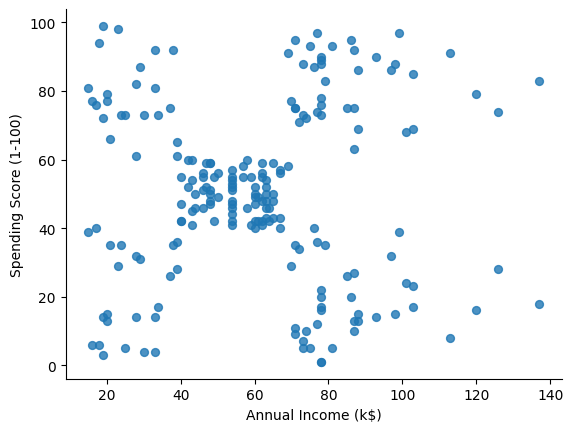

In [13]:
# @title Annual Income (k$) vs Spending Score (1-100)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
from sklearn.cluster import KMeans

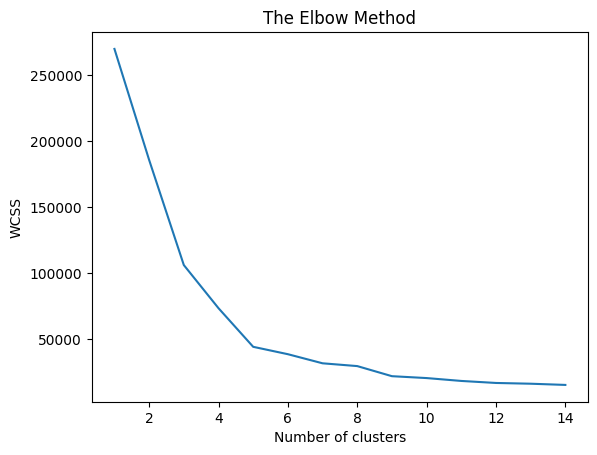

In [39]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [41]:
cluster_num=kmeans.fit_predict(df)
cluster_num

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [44]:
df['cluster_number']=cluster_num

In [48]:
df

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [49]:
df.groupby(['cluster_number']).count()

,Annual Income (k$),Spending Score (1-100)
cluster_number,,
0,81,81
1,39,39
2,35,35
3,23,23
4,22,22


In [50]:
df2=df

In [51]:
df=df.drop(columns=['cluster_number'])

In [52]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


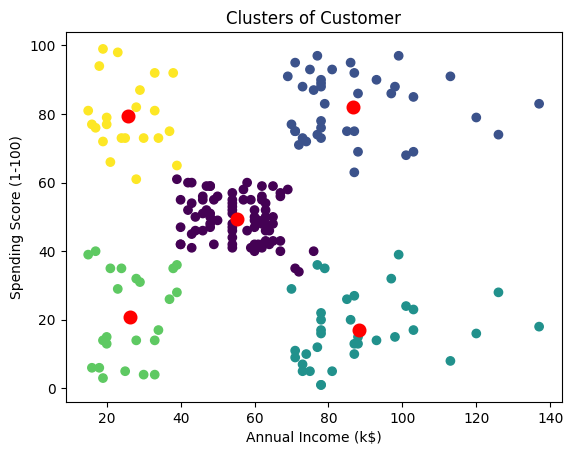

In [61]:
# Get the cluster centers
centroids = kmeans.cluster_centers_

# Create a scatter plot of the data points, colored by cluster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, linewidths=3, color='red', zorder=5)

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customer')

# Show the plot
plt.show()
